In [29]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [30]:
df = pd.read_csv(r'../Datasets/churn.csv')
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [31]:
df.shape


(10000, 14)

In [32]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

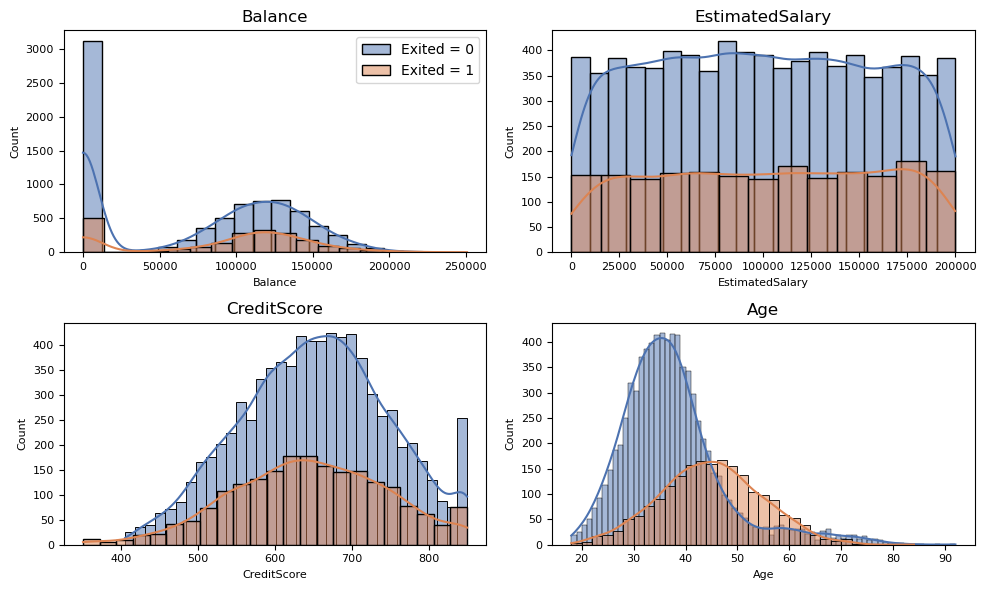

In [33]:
numerical_features = df[['Balance', 'EstimatedSalary', 
                         'CreditScore', 'Age', 'Exited']].copy()
exit_values = numerical_features['Exited'].unique()
sns.set_palette("deep")

plt.figure(figsize=(10, 6))

for i, feature in enumerate(numerical_features.columns[:-1]): 
    plt.subplot(2, 2, i + 1)

    sns.histplot(data=numerical_features[numerical_features['Exited'] == 0], 
                 x=feature, kde=True, label='Exited = 0')
    sns.histplot(data=numerical_features[numerical_features['Exited'] == 1], 
                 x=feature, kde=True, label='Exited = 1')

    plt.title(f'{feature}', fontsize=12)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.tick_params(axis='both', labelsize=8)
    
    if i > 0:
        plt.legend().set_visible(False)
    else:
        plt.legend()

plt.tight_layout()
plt.show()

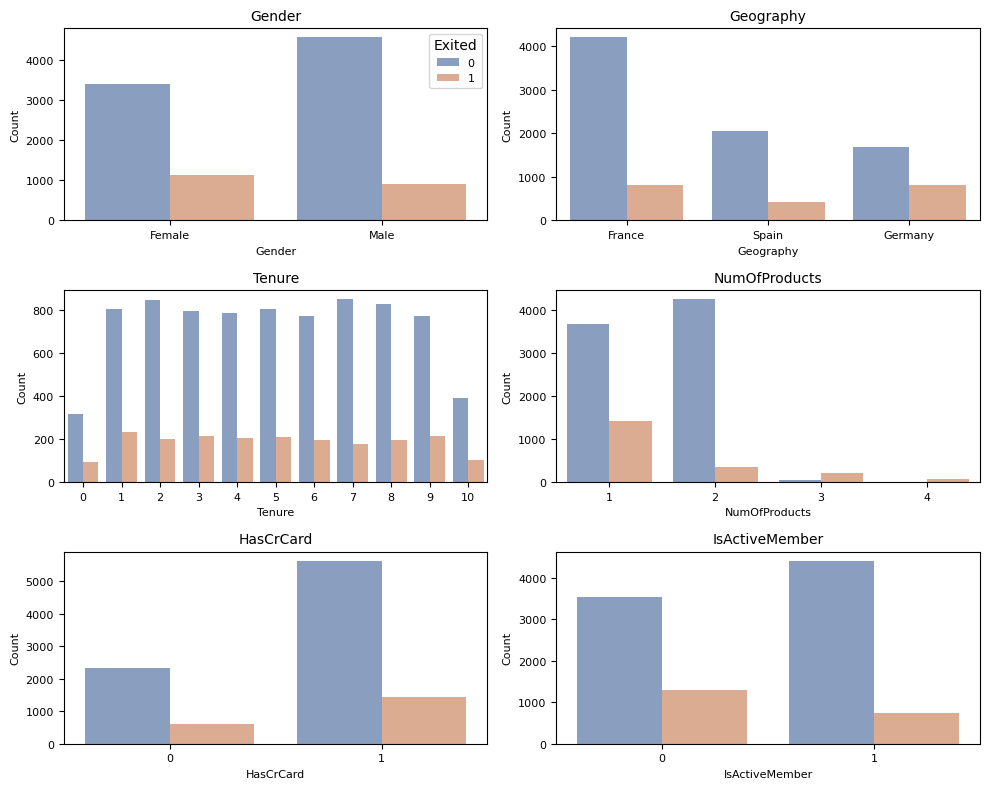

In [34]:
categorical_features = df[['Gender', 'Geography', 
            'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

sns.set_palette("deep")

plt.figure(figsize=(10, 8))

for i, feature in enumerate(categorical_features.columns[:-1]):
    plt.subplot(3, 2, i + 1)

    sns.countplot(data=categorical_features, x=feature, hue='Exited', alpha = 0.7)
    plt.title(f'{feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.tick_params(axis='both', labelsize=8)
    if i > 0:
        plt.legend().set_visible(False)
    else:
        plt.legend(title='Exited', fontsize=8)
plt.tight_layout()
plt.show()

In [35]:
gender_churn_percentage = df.groupby('HasCrCard')['Exited'].mean() * 100
gender_churn_percentage

HasCrCard
0    20.814941
1    20.184266
Name: Exited, dtype: float64

In [36]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [37]:
label_encoder = LabelEncoder()
df['Geography_LabelEncoded'] = label_encoder.fit_transform(df['Geography'])